<a href="https://colab.research.google.com/github/yuktabutala/mlda_project/blob/main/MLDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning and Data Analysis Term Project**

We have uploaded the dataset to Google drive, first we will be importing it to this Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [9]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Checking the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [10]:
pwd


'/content/gdrive/My Drive/Kaggle'

In [11]:
!ls

Breast_cancer_data.csv	kaggle.json  smart_grid_stability_augmented.csv


**Objectives:**


We will analyze and visualise the data using correlation of every feature with one another.

In this study, we will also try to predict Breast Cancer using different algorithm as we proceed further in the course work:

 1. Logistic regression classification

*(rest will be added as we complete them in the class)*

In [12]:
# importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [14]:
# converting the imported data to dataframe and printing the data information
data = pd.read_csv('/content/gdrive/My Drive/Kaggle/Breast_cancer_data.csv')
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()


Dataset : (569, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Observations from the output:

The data has 6 columns with 569 entries in each.
Out of the 6, the last column labels the data:
label '1' : abnormal brest cells/cancer
label '2; : normal brest cell

The first 5 columns are the features of the brest cell:

1. mean_radius (mean of distances from center to points on the perimeter)
2. mean_texture (standard deviation of gray-scale values)
3. mean_perimeter
4. mean_area
5. mean_smoothness (local variation in radius lengths)

By studying these five characteristics we will predict if a brest cell is normal or cancerous.

In [16]:
# we will have a look at first 5 rows of our dataset
data[0:5]


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Observations from the output:

Wow, all the first five are normal breast cells!
Let us try printing some random rows to have a look at both kinds of labels in the diagnosis column.

In [17]:
data[15:25]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
15,14.540,27.54,96.73,658.8,0.11390,0
16,14.680,20.13,94.74,684.5,0.09867,0
17,16.130,20.68,108.10,798.8,0.11700,0
18,19.810,22.15,130.00,1260.0,0.09831,0
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
22,15.340,14.26,102.50,704.4,0.10730,0
23,21.160,23.04,137.20,1404.0,0.09428,0
24,16.650,21.38,110.00,904.6,0.11210,0


Observations from the output:

The samples in row number 19, 20 and 21 are abnormal cells.
Let us now check how many of the 569 samples are are benign(abnormal) and how many are malignant(normal).

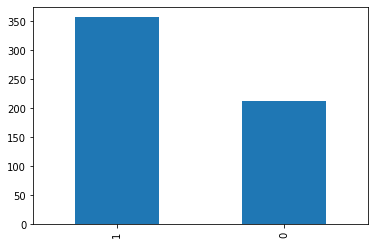

In [25]:
# plots the count of benign cells Vs malignant cells in a bar plot
data.diagnosis.value_counts()[0:568].plot(kind='bar')
plt.show()

Observations from the output:

As it can be seen in the plot, there are 357 benign and 212 malignant samples.

Next task is to find the correlation of each feature with every other feature.

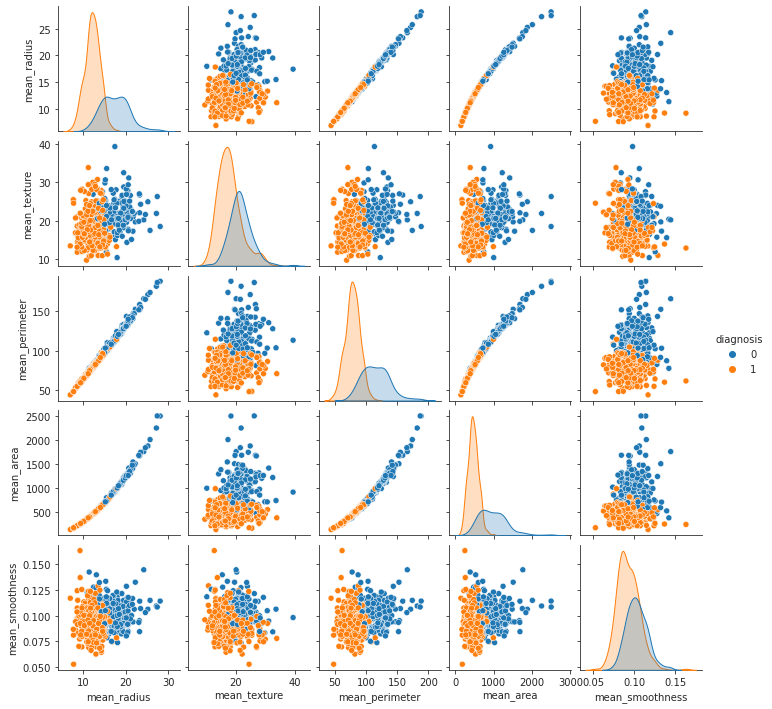

In [38]:
# getting the correlation between every other feature as a scatter plot
sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis",kind='scatter', height=2);
plt.show()

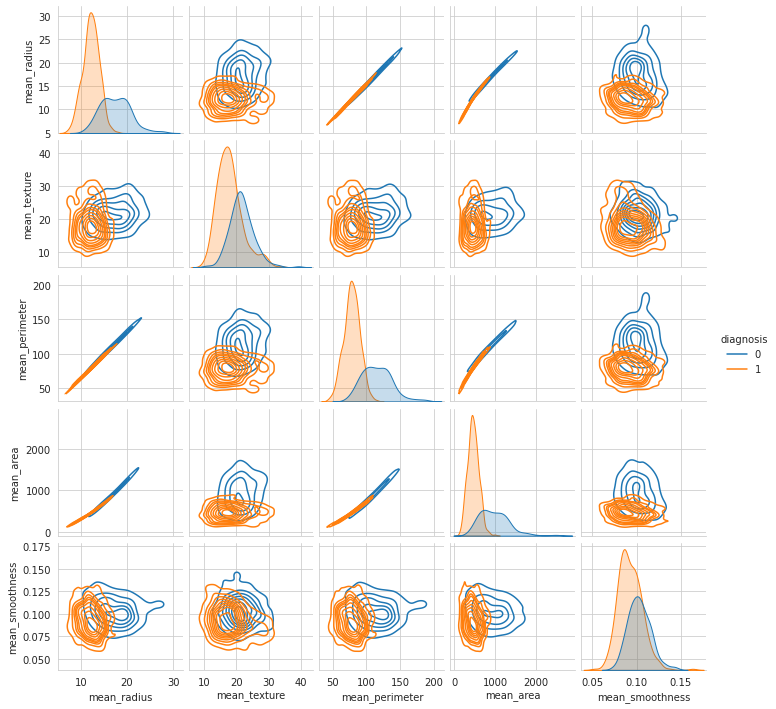

In [43]:
# Getting the correlation between different features as a distribution
sns.set_style("whitegrid")
sns.pairplot(data,hue="diagnosis",kind= 'kde', height=2);
plt.show()


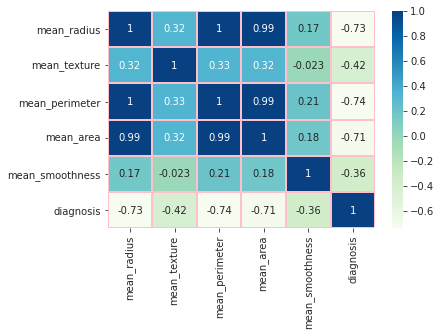

In [40]:
# plotting a correlation matrix

#Subsetting the data
data = data[['mean_radius','mean_texture','mean_perimeter','mean_area', 'mean_smoothness','diagnosis']] 
#Calculate the correlation of the above variables
cor = data.corr() 
#Plot the correlation as heat map
sns.heatmap(cor, square=True, annot=True, cmap='GnBu', linewidths=1, linecolor='pink') 

Observations from the output:

As you can see above, we obtain the heatmap of correlation among the variables/features. The color palette in the side represents the amount of correlation among the variables. The darker shade represents a high correlation.
And yes, a feature correlated by itself gives the output 1, as seen on the main diagonal of the correlation matrix.

Now that we have gone through the dataset thoroughly, let us go to the training part.


Before training the data to predict required samples, it is necessary to optimally partition the data into a training set and test set. For this study using a sample size of 20%, assumed it ideal ratio between training and testing.

In [44]:
# parting the original dataset to training set and test set
from sklearn.model_selection import train_test_split
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [45]:
# getting the size of test set and train set
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


Observations from the outputs:

The complete dataset of 569 rows is divided in two parts:
1. train set: 455 samples
2. test set : 114 samples

Let us now classify the data using various techniques!

**1. Logistic regression classification**

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input (X)
belongs to the default class (Y=1)) (P(X)=P(Y=1|X)).

In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Starting from making an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. We will train the logistic regression model with the training data, and then apply such model to the test data.

In [46]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

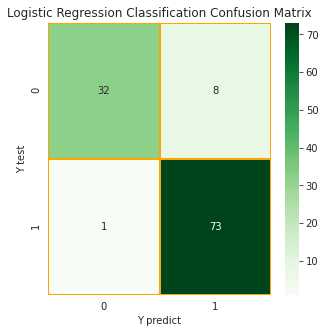

In [49]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=1, linecolor='orange', fmt='g', ax=ax, cmap="Greens")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [50]:
# Testing the model on test set
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)


0.9210526315789473


Observations from the outputs:

From the confusion Matrix we can observe that out of the 114 samples from the test set, 74 were labelled as '1' and 40 were labelled as '0'.

Out of the 40 labelled as '0', our model predicted:
1. 32 are labelled '0'
2. 8 are labelled '1'
So 8 wrong predictions.

Out of the 74 labelled as '1', our model predicted:
1. 73 are labelled '1'
2. 1 is labelled '0'
So 1 wrong prediction.

That gives a total of 9 wrong predictions on a set of 114, ie. accuracy is 0.9210526315789473.